In [5]:
#Required libraries
import datetime
import pandas as pd
import sqlite3

### creating the data frame as per table colums with column names as per csv

In [131]:
# col_names=['dealership_id','vin','mileage','is_new','stock_number','dealer_year','dealer_make','dealer_model','dealer_trim','dealer_model_number','dealer_msrp','dealer_invoice','dealer_body','dealer_inventory_entry_date','dealer_exterior_color_description','dealer_interior_color_description','dealer_exterior_color_code','dealer_interior_color_code','dealer_transmission_name','dealer_transmission_type','dealer_installed_option_codes','dealer_installed_option_descriptions','dealer_additional_specs','dealer_doors','dealer_drive_type','dealer_images','dealer_certified']
df_dealer1=pd.read_csv('feeds/provider1/dealership1.csv')
df_dealer1.head(5)

,Dealer ID,Stock,Type,VIN,Year,Make,Model,Trim,ModelNumber,ExteriorColor,...,Invoice,ImageList,Video_URL,OtherMedia,DamageWaiverValue,OptionCode,OptionDescription,Certified,DMSStatus,List Price
0,dealership1,K8539A,Used,KNDJ23AU9L7116259,2020,Kia,Soul,S,B2532,Mars Orange,...,0,https://content.homenetiol.com/2001453/2131934...,NaN,NaN,NaN,"CN,EH,BA-0,M3R,CF,GDM",NaN,Yes,NaN,22500
1,dealership1,K8441A,Used,3KPF24AD3LE173195,2020,Kia,Forte,FE,C3412,Gravity Grey,...,0,https://content.homenetiol.com/2001453/2131934...,NaN,NaN,NaN,"KDG,WK-I,BA,EH,CF,CA",NaN,Yes,NaN,21500
2,dealership1,K8517A,Used,KNDPN3AC1L7649473,2020,Kia,Sportage,EX,42242,Snow White Pearl,...,0,https://content.homenetiol.com/2001453/2131934...,NaN,NaN,NaN,"GBU-1,GBU-2,SWP,CB-0,CF,TE4",NaN,Yes,NaN,30500
3,dealership1,K8559A,Used,3KPF34AD1LE160250,2020,Kia,Forte,GT-Line,C3452,Aurora Black,...,0,https://content.homenetiol.com/2001453/2131934...,NaN,NaN,NaN,"WK-I,CN,ABP,BA,EH,CF,PRC",NaN,Yes,NaN,22900
4,dealership1,K8545A,Used,5XXGT4L31LG448091,2020,Kia,Optima,S,53232,Gravity Grey,...,0,https://content.homenetiol.com/2001453/2131934...,NaN,NaN,NaN,"WK,KDG,EH,CA,CF",NaN,Yes,NaN,26900


### Below operations are performed in susequent cell: 
1) Renaming columns as per the mapping specified,
2) Removed extra columns
2) Created primary key hash column
Note: dealer_transmission_type is not present in table, however present in the mapping

In [132]:
# This is for dealer1 file
df_dealer1.rename(columns={"Dealer ID":"dealership_id","VIN":"vin","Miles":"mileage","Type":"is_new","Stock":"stock_number","Year":"dealer_year","Make":"dealer_make","Model":"dealer_model","Trim":"dealer_trim","ModelNumber":"dealer_model_number","MSRP":"dealer_msrp","Invoice":"dealer_invoice","Body":"dealer_body","DateInStock":"dealer_inventory_entry_date","ExteriorColor":"dealer_exterior_color_description","InteriorColor":"dealer_interior_color_description","ExteriorColorCode":"dealer_exterior_color_code","InteriorColorCode":"dealer_interior_color_code","Transmission":"dealer_transmission_name","OptionCode":"dealer_installed_option_codes","OptionDescription":"dealer_installed_option_descriptions","AdditionalSpecs":"dealer_additional_specs","Drivetrain":"dealer_drive_type","ImageList":"dealer_images","Certified":"dealer_certified"},inplace=True)
# df_dealer1['hash']='NAN'
df_dealer1.insert(0, 'hash', range(1, 1 + len(df_dealer1)))
df_dealer1['updated_at']=datetime.datetime.now().date()
df_dealer1['dealer_doors']='NAN'
df_dealer1['dealer_transmission_type']='NAN'
col_final=['hash','dealership_id','vin','mileage','is_new','stock_number','dealer_year','dealer_make','dealer_model','dealer_trim','dealer_model_number','dealer_msrp','dealer_invoice','dealer_body','dealer_inventory_entry_date','dealer_exterior_color_description','dealer_interior_color_description','dealer_exterior_color_code','dealer_interior_color_code','dealer_transmission_name','dealer_transmission_type','updated_at','dealer_installed_option_codes','dealer_installed_option_descriptions','dealer_additional_specs','dealer_doors','dealer_drive_type','updated_at','dealer_images','dealer_certified']
df_dealer1=df_dealer1.drop(columns=[col for col in df_dealer1 if col not in col_final])
df_dealer1=df_dealer1[['hash','dealership_id','vin','mileage','is_new','stock_number','dealer_year','dealer_make','dealer_model','dealer_trim','dealer_model_number','dealer_msrp','dealer_invoice','dealer_body','dealer_inventory_entry_date','dealer_exterior_color_description','dealer_interior_color_description','dealer_exterior_color_code','dealer_interior_color_code','dealer_transmission_name','dealer_transmission_type','dealer_installed_option_codes','dealer_installed_option_descriptions','dealer_additional_specs','dealer_doors','dealer_drive_type','updated_at','dealer_images','dealer_certified']]
df_dealer1.head(5)

,hash,dealership_id,vin,mileage,is_new,stock_number,dealer_year,dealer_make,dealer_model,dealer_trim,...,dealer_transmission_name,dealer_transmission_type,dealer_installed_option_codes,dealer_installed_option_descriptions,dealer_additional_specs,dealer_doors,dealer_drive_type,updated_at,dealer_images,dealer_certified
0,1,dealership1,KNDJ23AU9L7116259,19835,Used,K8539A,2020,Kia,Soul,S,...,Variable,NAN,"CN,EH,BA-0,M3R,CF,GDM",NaN,"CARPETED FLOOR MATS,BLACK/GRAY WOVEN CLOTH SE...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
1,2,dealership1,3KPF24AD3LE173195,20799,Used,K8441A,2020,Kia,Forte,FE,...,Variable,NAN,"KDG,WK-I,BA,EH,CF,CA",NaN,"GRAVITY GREY,BLACK WOVEN CLOTH SEAT TRIM,REAR...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
2,3,dealership1,KNDPN3AC1L7649473,31873,Used,K8517A,2020,Kia,Sportage,EX,...,Automatic,NAN,"GBU-1,GBU-2,SWP,CB-0,CF,TE4",NaN,"GRAY LEATHER SEAT TRIM,GRAY LEATHERETTE SEAT...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
3,4,dealership1,3KPF34AD1LE160250,33191,Used,K8559A,2020,Kia,Forte,GT-Line,...,Variable,NAN,"WK-I,CN,ABP,BA,EH,CF,PRC",NaN,BLACK CLOTH & LEATHERETTE SEAT TRIM -inc: wh...,NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
4,5,dealership1,5XXGT4L31LG448091,24874,Used,K8545A,2020,Kia,Optima,S,...,Automatic,NAN,"WK,KDG,EH,CA,CF",NaN,"BLACK CLOTH/LEATHERETTE SEAT TRIM,GRAVITY GRE...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes


In [133]:
df_dealer1.shape

(49, 29)

In [134]:
df_dealer2=pd.read_csv('feeds/provider2/dealership2.csv')
df_dealer2.head(5)

,DealerId,Year,Make,Model,VIN,Stock #,Mileage,Inventory Date,MSRP,Invoice,...,Interior Color,Options,Photos,Exterior Color Code,Option Codes,Interior Color Code,Model Code,New/Used,Trim,Transmission
0,dealership2,2019,Ford,Explorer,1FM5K7D80KGA16049,50854,4,10/31/2021,35395.0,33902.0,...,Ebony Black,Equipment Group 200A|3.39 Non-Limited-Slip Axl...,NaN,NaN,NaN,NaN,K7D,N,XLT,6-Speed Automatic
1,dealership2,2019,Ford,Explorer,1FM5K7F82KGA42410,50855,3,10/31/2021,45520.0,43559.0,...,Ebony Black,Equipment Group 300A|3.39 Non-Limited-Slip Axl...,http://vehicle-photos-published.vauto.com/54/8...,NaN,NaN,NaN,K7F,N,Limited,6-Speed Automatic
2,dealership2,2019,Ford,Explorer,1FM5K8D85KGA10236,50853,4,10/31/2021,38115.0,36494.0,...,Ebony Black,Equipment Group 200A|3.65 Non-Limited Slip Axl...,http://vehicle-photos-published.vauto.com/c6/8...,NaN,NaN,NaN,K8D,N,XLT,6-Speed Automatic
3,dealership2,2019,Ford,Fusion,3FA6P0HD1KR115583,26980,9,10/31/2021,26110.0,24778.0,...,Light Putty,"Equipment Group 151A|Wheels: 17"" Sparkle Silve...",http://vehicle-photos-published.vauto.com/6f/5...,NaN,NaN,NaN,P0H,N,SE,6-Speed Automatic
4,dealership2,2019,Ford,Fiesta,3FADP4DJ2KM110951,27011,9,11/20/2021,19595.0,19311.0,...,Charcoal Black Bolster With Red Seat Stitching,Equipment Group 350A|Unique Cloth Front Sport ...,http://vehicle-photos-published.vauto.com/21/0...,NaN,NaN,NaN,P4D,N,ST,Automatic


In [135]:
df_dealer2.columns


Index(['DealerId', 'Year', 'Make', 'Model', 'VIN', 'Stock #', 'Mileage',
       'Inventory Date', 'MSRP', 'Invoice', 'Exterior Color', 'Interior Color',
       'Options', 'Photos', 'Exterior Color Code', 'Option Codes',
       'Interior Color Code', 'Model Code', 'New/Used', 'Trim',
       'Transmission'],
      dtype='object')

In [136]:
df_dealer2.shape

(49, 21)

In [137]:
df_dealer2.rename(columns={"DealerId":"dealership_id",
"VIN":"vin",
"Mileage":"mileage",
"New/Used":"is_new",
"Stock #":"stock_number",
"Year":"dealer_year",
"Make":"dealer_make",
"Model":"dealer_model",
"Trim":"dealer_trim",
"Model Code":"dealer_model_number",
"MSRP":"dealer_msrp",
"Invoice":"dealer_invoice",
"Inventory Date":"dealer_inventory_entry_date",
"Exterior Color":"dealer_exterior_color_description",
"Interior Color":"dealer_interior_color_description",
"Exterior Color Code":"dealer_exterior_color_code",
"Interior Color Code":"dealer_interior_color_code",
"Transmission":"dealer_transmission_name",
"Transmission_type":"dealer_transmission_type",
"Option Codes":"dealer_installed_option_codes",
"Options":"dealer_installed_option_descriptions",
"Photos":"dealer_images"},inplace=True)

df_dealer2.insert(0, 'hash', range(1, 1 + len(df_dealer2)))
df_dealer2['updated_at']=datetime.datetime.now().date()
df_dealer2['dealer_doors']='NAN'
df_dealer2['dealer_transmission_type']='NAN'
df_dealer2['dealer_body']='NAN'
df_dealer2['dealer_additional_specs']='NAN'
df_dealer2['dealer_drive_type']='NAN'
df_dealer2['dealer_certified']='NAN'
col_final2=['hash','dealership_id','vin','mileage','is_new','stock_number','dealer_year','dealer_make','dealer_model','dealer_trim','dealer_model_number','dealer_msrp','dealer_invoice','dealer_body','dealer_inventory_entry_date','dealer_exterior_color_description','dealer_interior_color_description','dealer_exterior_color_code','dealer_interior_color_code','dealer_transmission_name','dealer_transmission_type','updated_at','dealer_installed_option_codes','dealer_installed_option_descriptions','dealer_additional_specs','dealer_doors','dealer_drive_type','dealer_images','dealer_certified']
df_dealer2=df_dealer2.drop(columns=[col for col in df_dealer2 if col not in col_final2])
df_dealer2=df_dealer2[['hash','dealership_id','vin','mileage','is_new','stock_number','dealer_year','dealer_make','dealer_model','dealer_trim','dealer_model_number','dealer_msrp','dealer_invoice','dealer_body','dealer_inventory_entry_date','dealer_exterior_color_description','dealer_interior_color_description','dealer_exterior_color_code','dealer_interior_color_code','dealer_transmission_name','dealer_transmission_type','dealer_installed_option_codes','dealer_installed_option_descriptions','dealer_additional_specs','dealer_doors','dealer_drive_type','updated_at','dealer_images','dealer_certified']]
df_dealer2.head(5)

,hash,dealership_id,vin,mileage,is_new,stock_number,dealer_year,dealer_make,dealer_model,dealer_trim,...,dealer_transmission_name,dealer_transmission_type,dealer_installed_option_codes,dealer_installed_option_descriptions,dealer_additional_specs,dealer_doors,dealer_drive_type,updated_at,dealer_images,dealer_certified
0,1,dealership2,1FM5K7D80KGA16049,4,N,50854,2019,Ford,Explorer,XLT,...,6-Speed Automatic,NAN,NaN,Equipment Group 200A|3.39 Non-Limited-Slip Axl...,NAN,NAN,NAN,2022-03-05,NaN,NAN
1,2,dealership2,1FM5K7F82KGA42410,3,N,50855,2019,Ford,Explorer,Limited,...,6-Speed Automatic,NAN,NaN,Equipment Group 300A|3.39 Non-Limited-Slip Axl...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/54/8...,NAN
2,3,dealership2,1FM5K8D85KGA10236,4,N,50853,2019,Ford,Explorer,XLT,...,6-Speed Automatic,NAN,NaN,Equipment Group 200A|3.65 Non-Limited Slip Axl...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/c6/8...,NAN
3,4,dealership2,3FA6P0HD1KR115583,9,N,26980,2019,Ford,Fusion,SE,...,6-Speed Automatic,NAN,NaN,"Equipment Group 151A|Wheels: 17"" Sparkle Silve...",NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/6f/5...,NAN
4,5,dealership2,3FADP4DJ2KM110951,9,N,27011,2019,Ford,Fiesta,ST,...,Automatic,NAN,NaN,Equipment Group 350A|Unique Cloth Front Sport ...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/21/0...,NAN


## Creating hash as index which will be inserted as primary key in table

In [138]:
df_dealer1.set_index('hash')

,dealership_id,vin,mileage,is_new,stock_number,dealer_year,dealer_make,dealer_model,dealer_trim,dealer_model_number,...,dealer_transmission_name,dealer_transmission_type,dealer_installed_option_codes,dealer_installed_option_descriptions,dealer_additional_specs,dealer_doors,dealer_drive_type,updated_at,dealer_images,dealer_certified
hash,,,,,,,,,,,,,,,,,,,,,
1,dealership1,KNDJ23AU9L7116259,19835,Used,K8539A,2020,Kia,Soul,S,B2532,...,Variable,NAN,"CN,EH,BA-0,M3R,CF,GDM",NaN,"CARPETED FLOOR MATS,BLACK/GRAY WOVEN CLOTH SE...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
2,dealership1,3KPF24AD3LE173195,20799,Used,K8441A,2020,Kia,Forte,FE,C3412,...,Variable,NAN,"KDG,WK-I,BA,EH,CF,CA",NaN,"GRAVITY GREY,BLACK WOVEN CLOTH SEAT TRIM,REAR...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
3,dealership1,KNDPN3AC1L7649473,31873,Used,K8517A,2020,Kia,Sportage,EX,42242,...,Automatic,NAN,"GBU-1,GBU-2,SWP,CB-0,CF,TE4",NaN,"GRAY LEATHER SEAT TRIM,GRAY LEATHERETTE SEAT...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
4,dealership1,3KPF34AD1LE160250,33191,Used,K8559A,2020,Kia,Forte,GT-Line,C3452,...,Variable,NAN,"WK-I,CN,ABP,BA,EH,CF,PRC",NaN,BLACK CLOTH & LEATHERETTE SEAT TRIM -inc: wh...,NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
5,dealership1,5XXGT4L31LG448091,24874,Used,K8545A,2020,Kia,Optima,S,53232,...,Automatic,NAN,"WK,KDG,EH,CA,CF",NaN,"BLACK CLOTH/LEATHERETTE SEAT TRIM,GRAVITY GRE...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,Yes
6,dealership1,1FT8W3BT0LED65067,14518,Used,9P0800,2020,Ford,Super Duty F-350 SRW,LARIAT,W3B,...,Automatic,NAN,NaN,NaN,"Four Wheel Drive,Tow Hitch,Power Steering,ABS,...",NAN,4WD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,No
7,dealership1,5XXGT4L30LG398543,30555,Used,K8299B,2020,Kia,Optima,LX,53222,...,Automatic,NAN,"WK,KDG,CA,CF",NaN,BLACK CLOTH SEAT TRIM -inc: anti-soiling fab...,NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,No
8,dealership1,KNDPN3AC0L7676552,38512,Used,K8547A,2020,Kia,Sportage,EX,42242,...,Automatic,NAN,"SPL,GBU-1,GBU-2,SWP,CF,TE4,CA",NaN,"ILLUMINATED DOOR SILL PLATES,GRAY LEATHER SEA...",NAN,FWD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,No
9,dealership1,1GKS2BKDXMR140870,24427,Used,9P0812,2021,GMC,Yukon,SLT,TK10706,...,Automatic,NAN,"R6I,GU5,PZ8,WPL,NQH,ATN,PDP,NHT,4SA,AS8,UKV,MQ...",NaN,"BUILDABLE ORDER CONFIRMATION,REAR AXLE 3.23 R...",NAN,4WD,2022-03-05,https://content.homenetiol.com/2001453/2131934...,No


In [140]:
df_dealer2['hash']=df_dealer2['hash']+50
df_dealer2.set_index('hash')

,dealership_id,vin,mileage,is_new,stock_number,dealer_year,dealer_make,dealer_model,dealer_trim,dealer_model_number,...,dealer_transmission_name,dealer_transmission_type,dealer_installed_option_codes,dealer_installed_option_descriptions,dealer_additional_specs,dealer_doors,dealer_drive_type,updated_at,dealer_images,dealer_certified
hash,,,,,,,,,,,,,,,,,,,,,
51,dealership2,1FM5K7D80KGA16049,4,N,50854,2019,Ford,Explorer,XLT,K7D,...,6-Speed Automatic,NAN,NaN,Equipment Group 200A|3.39 Non-Limited-Slip Axl...,NAN,NAN,NAN,2022-03-05,NaN,NAN
52,dealership2,1FM5K7F82KGA42410,3,N,50855,2019,Ford,Explorer,Limited,K7F,...,6-Speed Automatic,NAN,NaN,Equipment Group 300A|3.39 Non-Limited-Slip Axl...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/54/8...,NAN
53,dealership2,1FM5K8D85KGA10236,4,N,50853,2019,Ford,Explorer,XLT,K8D,...,6-Speed Automatic,NAN,NaN,Equipment Group 200A|3.65 Non-Limited Slip Axl...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/c6/8...,NAN
54,dealership2,3FA6P0HD1KR115583,9,N,26980,2019,Ford,Fusion,SE,P0H,...,6-Speed Automatic,NAN,NaN,"Equipment Group 151A|Wheels: 17"" Sparkle Silve...",NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/6f/5...,NAN
55,dealership2,3FADP4DJ2KM110951,9,N,27011,2019,Ford,Fiesta,ST,P4D,...,Automatic,NAN,NaN,Equipment Group 350A|Unique Cloth Front Sport ...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/21/0...,NAN
56,dealership2,1FA6P8CFXK5106391,17,N,26936,2019,Ford,Mustang,GT Premium,P8C,...,10-Speed Automatic,NAN,NaN,"Equipment Group 401A|Wheels: 18"" x 8"" Machined...",NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/a5/a...,NAN
57,dealership2,1FD8W3E63KEC52360,85,N,50837,2019,Ford,F-350SD,NaN,W3E,...,6-Speed Automatic,NAN,NaN,NaN,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/14/c...,NAN
58,dealership2,1FDRF3F64KEC52340,71,N,50836,2019,Ford,F-350SD,NaN,F3F,...,6-Speed Automatic,NAN,NaN,NaN,NAN,NAN,NAN,2022-03-05,NaN,NAN
59,dealership2,1FA6P8CF1K5106389,37,N,26897,2019,Ford,Mustang,GT,P8C,...,10-Speed Automatic,NAN,NaN,Equipment Group 300A|6 Speakers|AM/FM radio|AM...,NAN,NAN,NAN,2022-03-05,http://vehicle-photos-published.vauto.com/24/8...,NAN


In [152]:
from sqlite3 import Error
database = r"C:\Users\Minni\rodo_assignment.db"
conn = sqlite3.connect(database)
sql_create_dealer_data = """ CREATE TABLE IF NOT EXISTS dealer_data(
                                        hash text PRIMARY KEY,
                                        dealership_id text NOT NULL,
                                        vin text,
                                        mileage integer,
                                        is_new boolean,
                                        stock_number text,
                                        dealer_year integer,
                                        dealer_make text,
                                        dealer_model text,
                                        dealer_trim text,
                                        dealer_model_number text,
                                        dealer_msrp integer,
                                        dealer_invoice integer,
                                        dealer_body text,
                                        dealer_inventory_entry_date date,
                                        dealer_exterior_color_description text,
                                        dealer_interior_color_description text,
                                        dealer_exterior_color_code text,
                                        dealer_interior_color_code text,
                                        dealer_transmission_name text,
                                        dealer_transmission_type text,
                                        dealer_installed_option_codes text[],
                                        dealer_installed_option_descriptions text[],
                                        dealer_additional_specs text,
                                        dealer_doors text,
                                        dealer_drive_type text,
                                        updated_at timestamp with time zone NOT NULL,
                                        dealer_images text[],
                                        dealer_certified boolean
                                        ); """
sql_drop_table_if_created=""" DROP TABLE dealer_data;"""

if conn is not None:
    cursor=conn.cursor()
#     cursor.execute(sql_drop_table_if_created)
    cursor.execute(sql_create_dealer_data)
    print("Table created.")
else:
    print("Error! cannot create the db connection.")


Table created.


In [154]:

# insert_statement="INSERT OR REPLACE INTO dealer_data(hash,dealership_id,vin,mileage,is_new,stock_number,dealer_year,dealer_make,dealer_model,dealer_trim,dealer_model_number,dealer_msrp,dealer_invoice,dealer_body,dealer_inventory_entry_date,dealer_exterior_color_description,dealer_interior_color_description,dealer_exterior_color_code,dealer_interior_color_code,dealer_transmission_name,dealer_installed_option_codes,dealer_installed_option_descriptions,dealer_additional_specs,dealer_doors,dealer_drive_type,updated_at,dealer_images,dealer_certified) VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)"
conn = sqlite3.connect(database)
if conn is not None:
    cursor=conn.cursor()
    df_dealer1.to_sql(name='dealer_data',con=conn,if_exists='append',index=False)
    df_dealer2.to_sql(name='dealer_data',con=conn,if_exists='append',index=False)
    conn.commit()
#     cursor.executemany(insert_statement,df_dealer1)
    print("Data inserted")
else:
    print("Error! cannot create the db connection.")

Data inserted


In [155]:
res=pd.read_sql_query("select count(*) from dealer_data;",conn)
# for i,v in enumerate(res):
#     print(i,v)
print(res)

   count(*)
0        98


### Data of both the files are ingested in the dealer_data table, connection to DB is closed now

In [150]:
conn.close()

### Data visualization Task 2: Analysis and Visualization (Bonus)

In [157]:
final_df=df_dealer1.append(df_dealer2)
final_df.shape


(98, 29)

In [170]:
pivt=df_dealer1.pivot_table(index=['dealer_year'],values=['vin'],aggfunc='count')
print(pivt)
pivt2=df_dealer2.pivot_table(index=['dealer_year'],values=['vin'],aggfunc='count')
print(pivt2)

             vin
dealer_year     
2017           2
2018           1
2019          14
2020          26
2021           6
             vin
dealer_year     
2018           8
2019          40


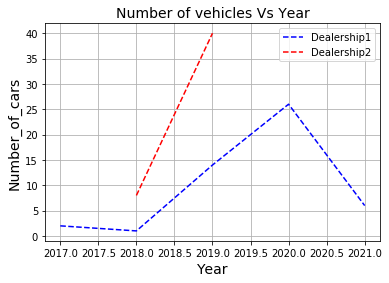

In [177]:
import matplotlib.pyplot as plt
year_list=[2017,2018,2019,2020,2021]
line1=plt.plot(year_list,pivt['vin'],ls='--',color='Blue')
line2=plt.plot([2018,2019],pivt2['vin'],ls='--',color='Red')

plt.title('Number of vehicles Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number_of_cars', fontsize=14)
plt.grid(True)
plt.legend(['Dealership1', 'Dealership2'], loc=1)
plt.show()
